<a href="https://colab.research.google.com/github/KC-ai/APPM4600/blob/main/NumericsHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1B

In [ ]:
def f(x):
    return 1 / (1 + (10 * x)**2)

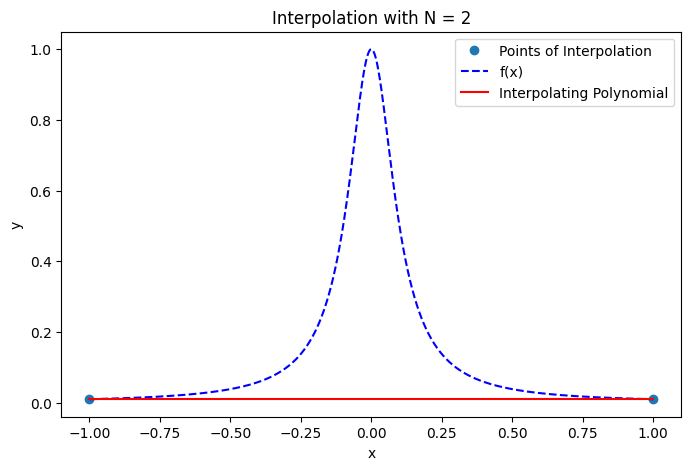

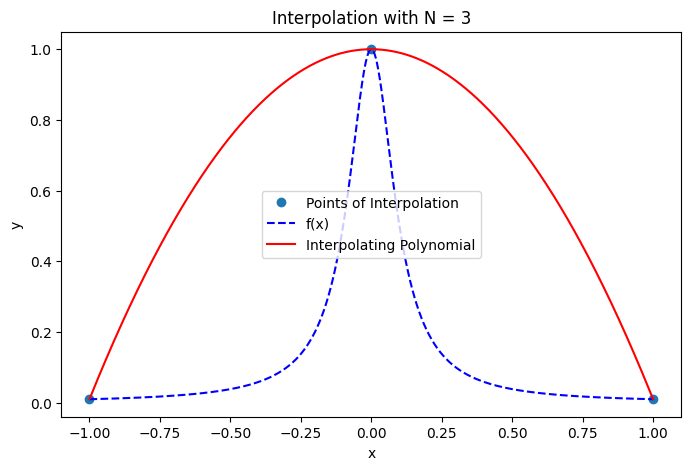

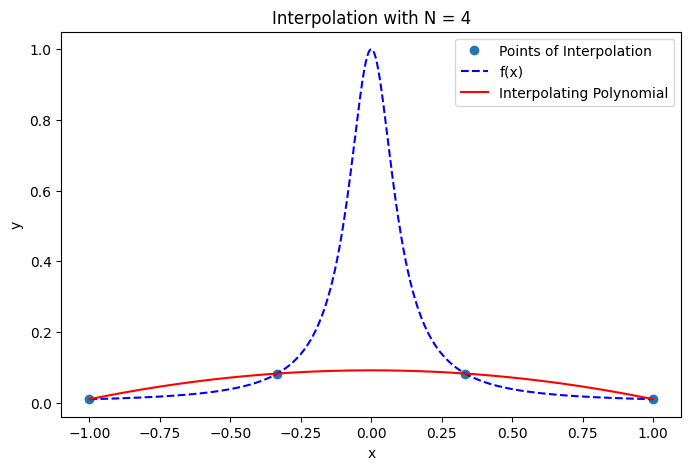

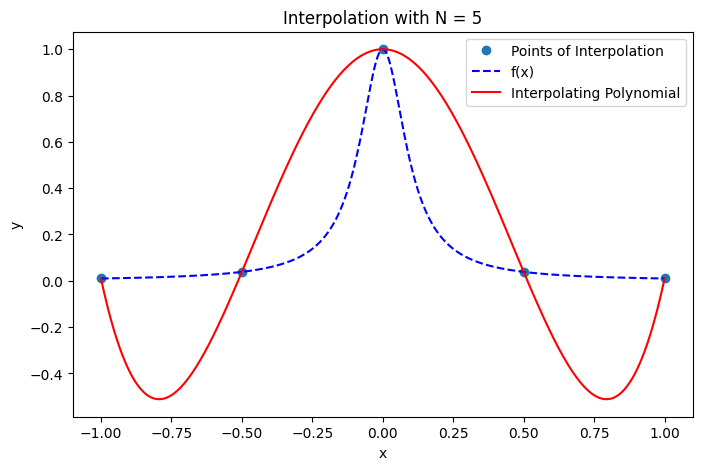

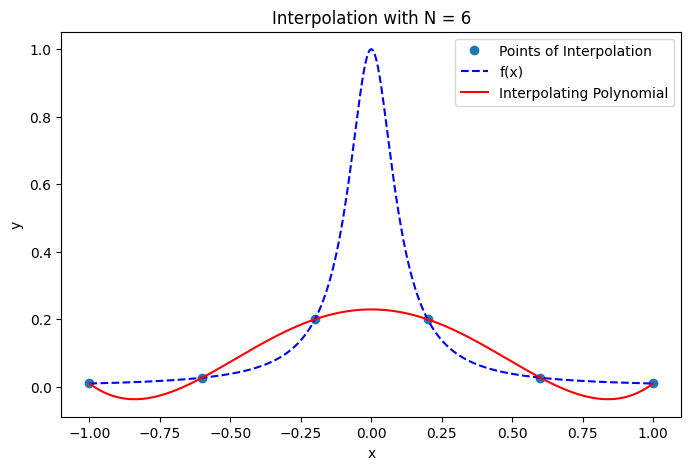

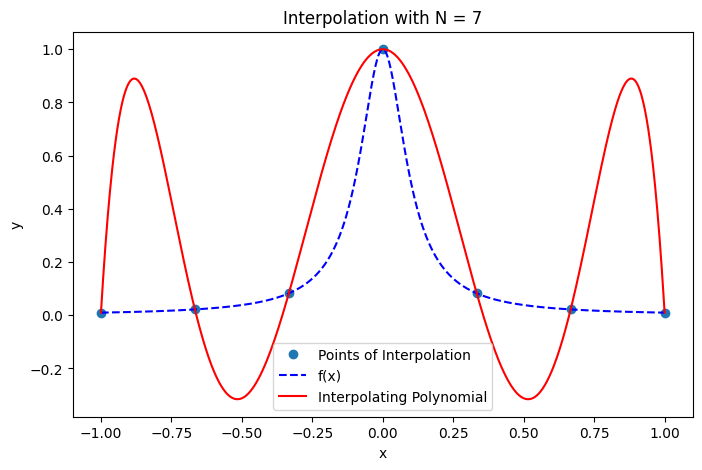

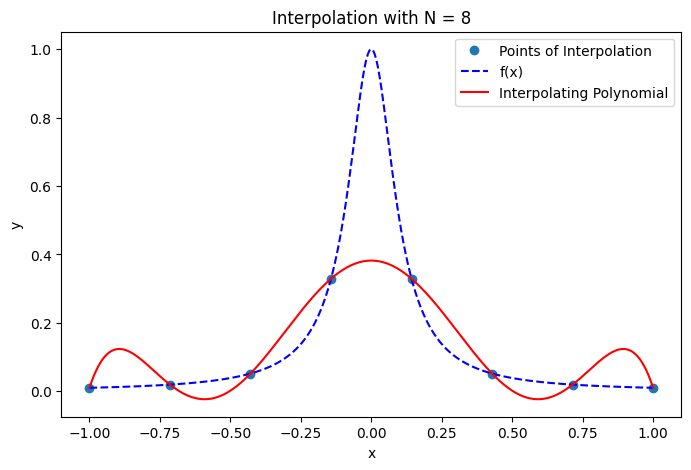

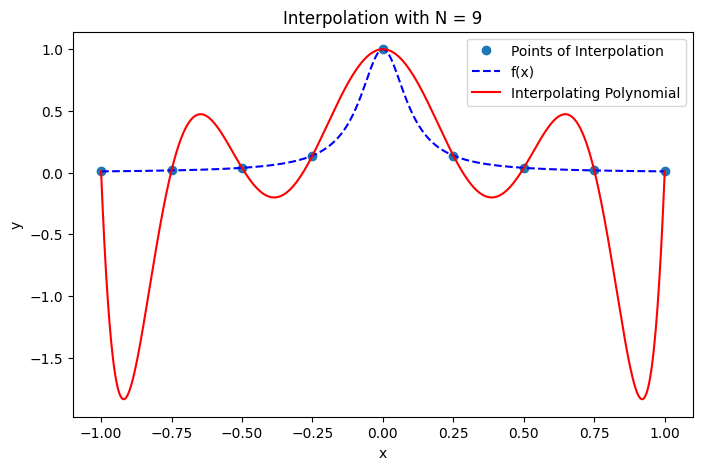

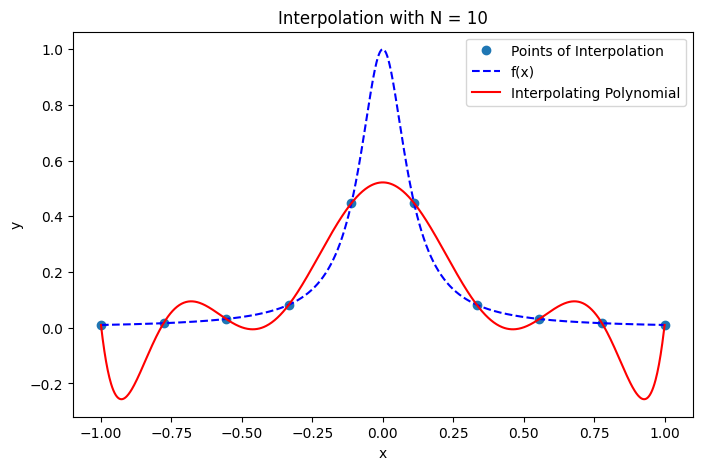

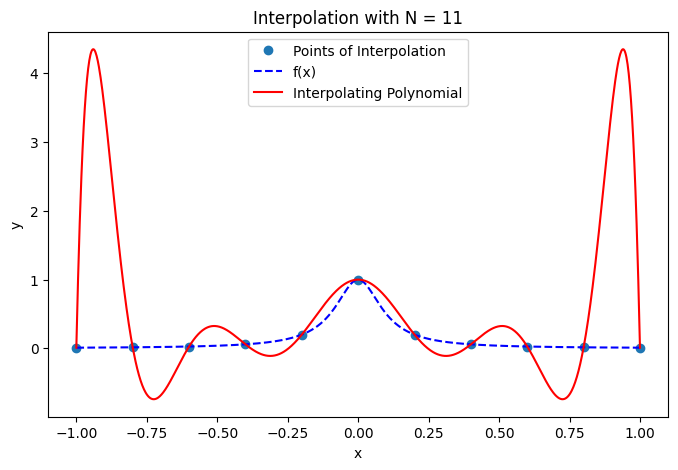

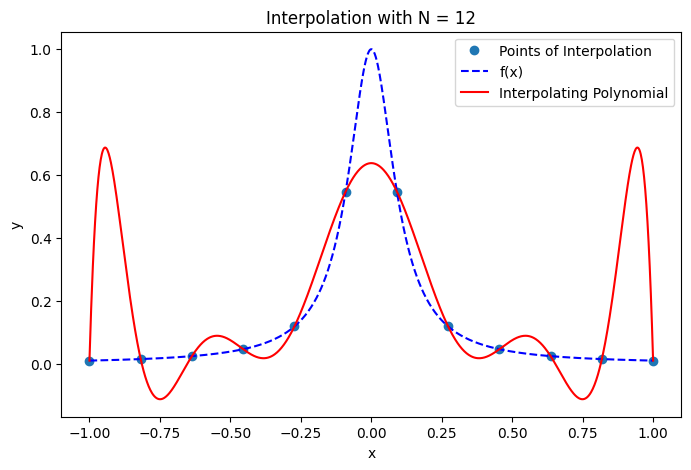

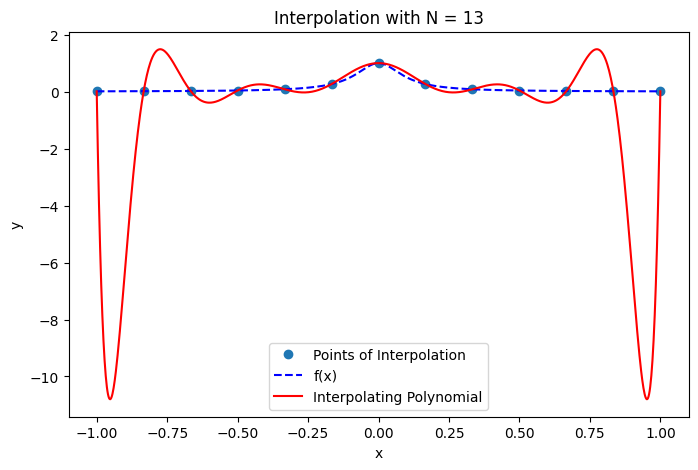

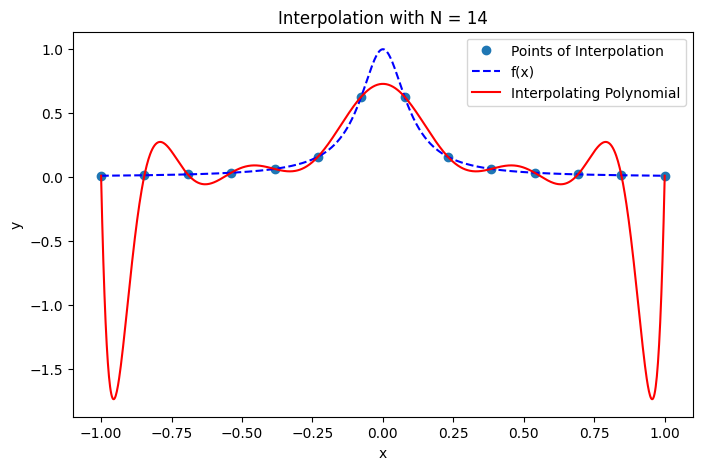

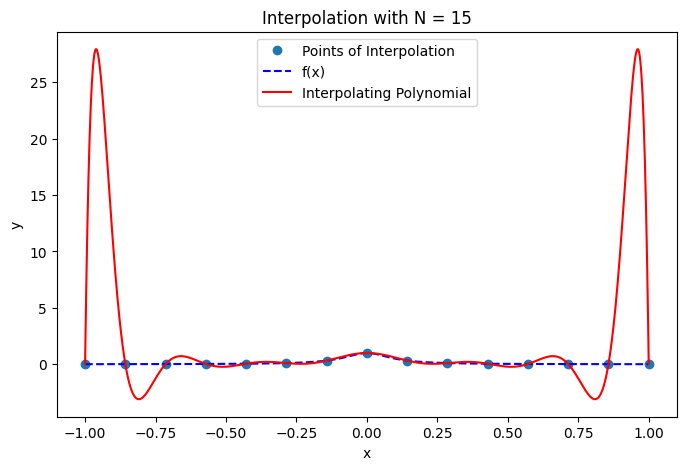

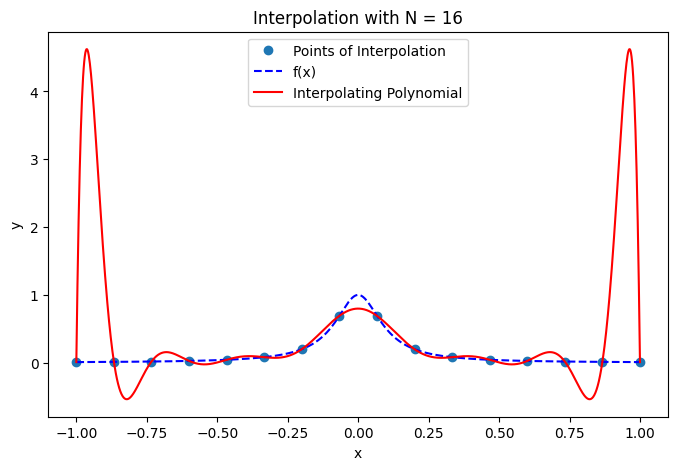

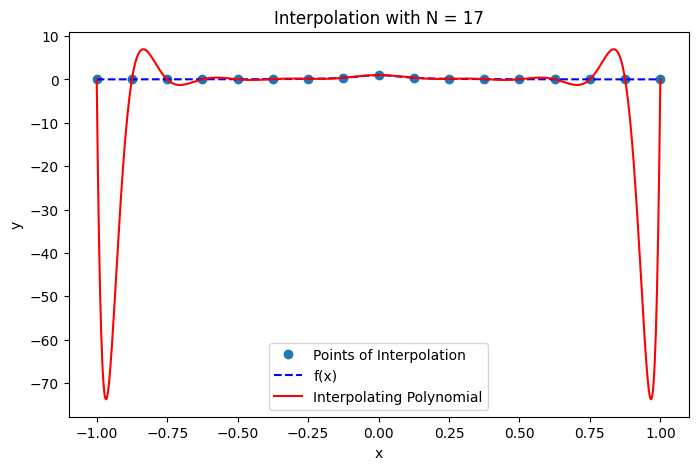

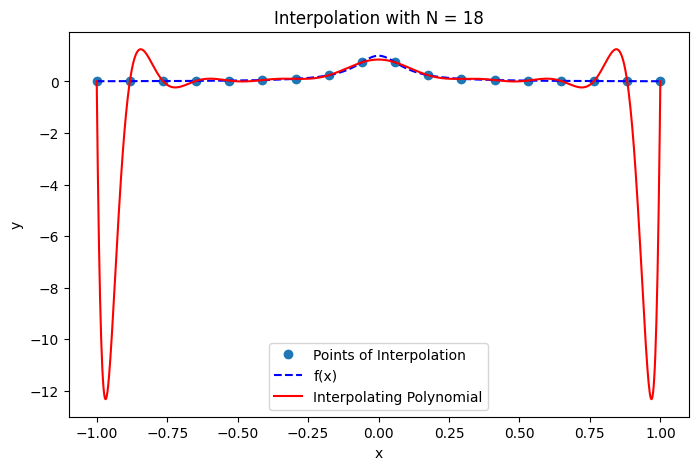

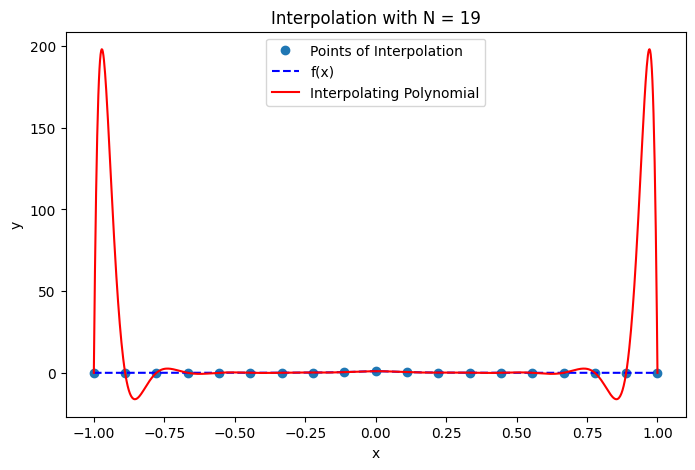

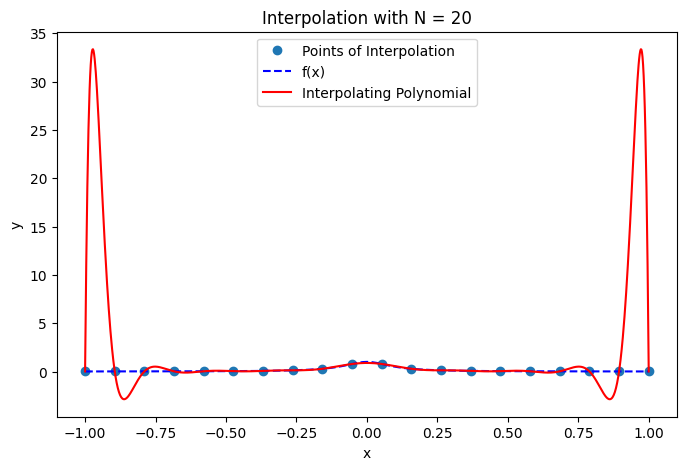

In [ ]:
for N in range(2, 21):
    x = np.linspace(-1, 1, N)
    y_val = f(x)

    V = np.vander(x, N, increasing=True)
    c = np.linalg.solve(V, y_val)

    x_rep = np.linspace(-1, 1, 1001)
    f_vals = f(x_rep)
    XfineV = np.vander(x_rep, N, increasing=True)
    p_vals = XfineV.dot(c)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y_val, 'o', label='Points of Interpolation')
    plt.plot(x_rep, f_vals, 'b--', label='f(x)')
    plt.plot(x_rep, p_vals, 'r-', label='Interpolating Polynomial')
    plt.title(f'Interpolation with N = {N}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# 2

<ipython-input-8-4235a13dc213>:20: RuntimeWarning: divide by zero encountered in divide
  temp = w[j] / diff
<ipython-input-8-4235a13dc213>:24: RuntimeWarning: invalid value encountered in divide
  pvals = numerator / denominator


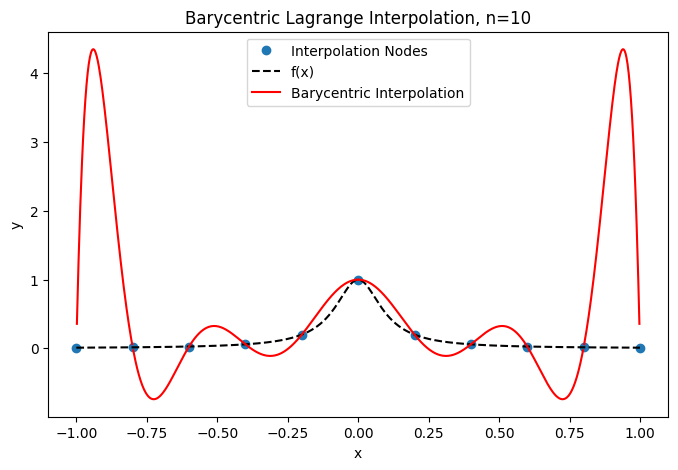

In [ ]:
def barycentric_weights(x):
    n = len(x)
    w = np.ones(n)
    for j in range(n):
        for i in range(n):
            if i != j:
                w[j] *= (x[j] - x[i])
        w[j] = 1.0 / w[j]
    return w

def barycentric_interpolate(x, y, w, x_calc):
    pvals = np.zeros_like(x_calc, dtype=float)

    numerator = np.zeros_like(x_calc, dtype=float)
    denominator = np.zeros_like(x_calc, dtype=float)

    for j in range(len(x)):
        diff = x_calc - x[j]

        temp = w[j] / diff
        numerator += temp * y[j]
        denominator += temp

    pvals = numerator / denominator
    return pvals

<ipython-input-8-4235a13dc213>:20: RuntimeWarning: divide by zero encountered in divide
  temp = w[j] / diff
<ipython-input-8-4235a13dc213>:24: RuntimeWarning: invalid value encountered in divide
  pvals = numerator / denominator


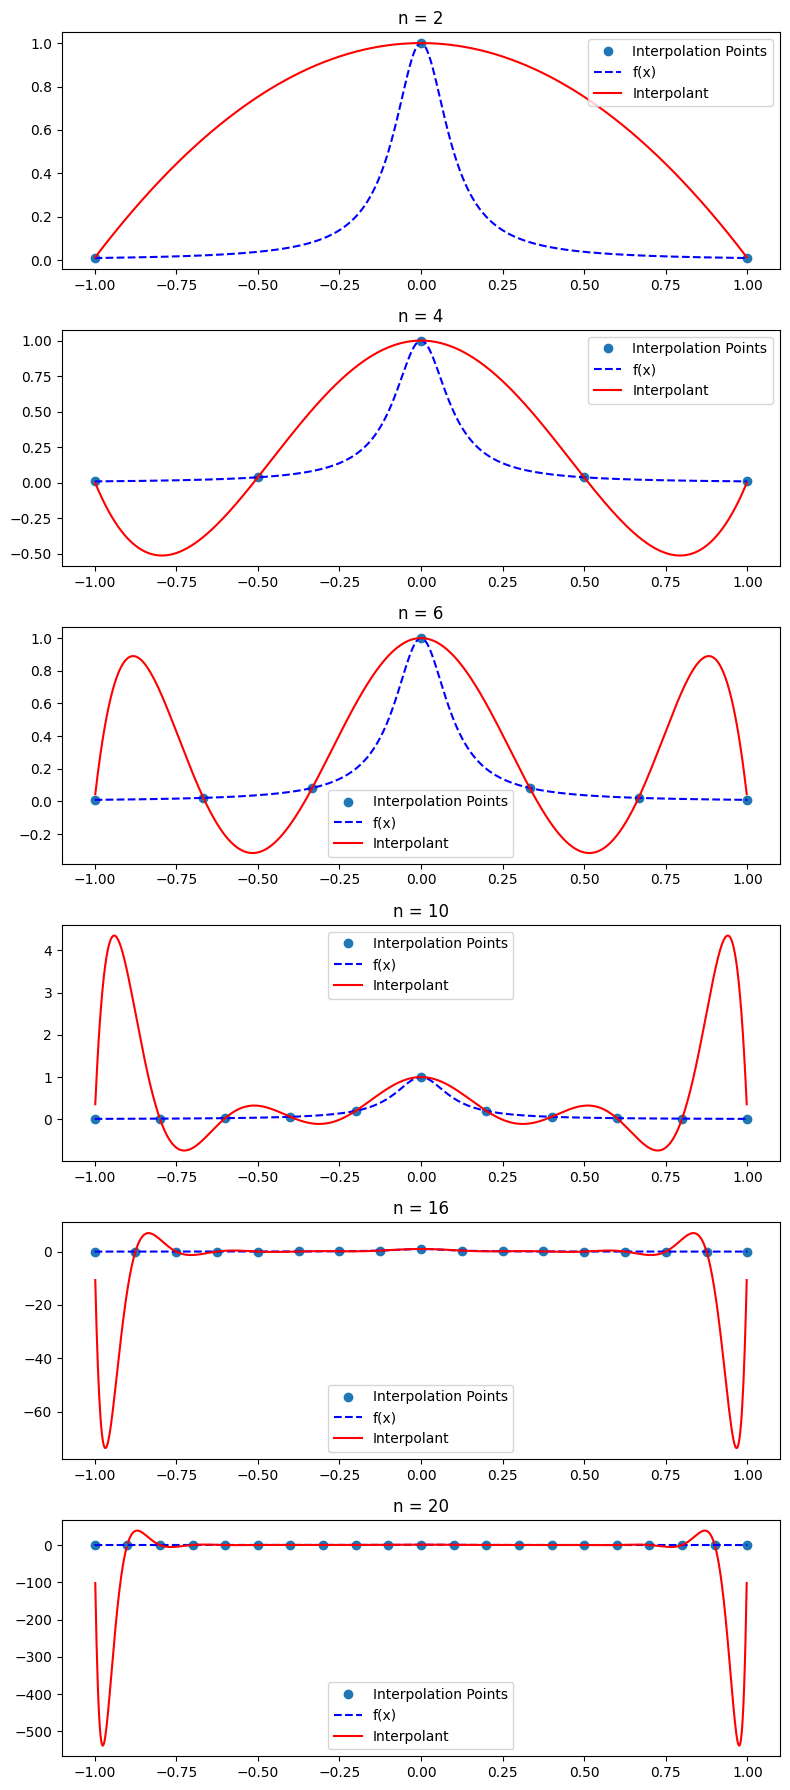

In [16]:
n_values = [2, 4, 6, 10, 16, 20]

x_reps = np.linspace(-1, 1, 1001)
f_out = f(x_reps)

fig, axes = plt.subplots(len(n_values), 1, figsize=(8, 3 * len(n_values)))

for a, n in zip(axes, n_values):
    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)
    weights = barycentric_weights(x_nodes)
    bary_out = barycentric_interpolate(x_nodes, y_nodes, weights, x_reps)
    a.plot(x_nodes, y_nodes, 'o', label='Interpolation Points')
    a.plot(x_reps, f_out, 'b--', label='f(x)')
    a.plot(x_reps, bary_out, 'r-', label='Interpolant')
    a.set_title(f'n = {n}')
    a.legend()
plt.tight_layout()
plt.show()


# 3

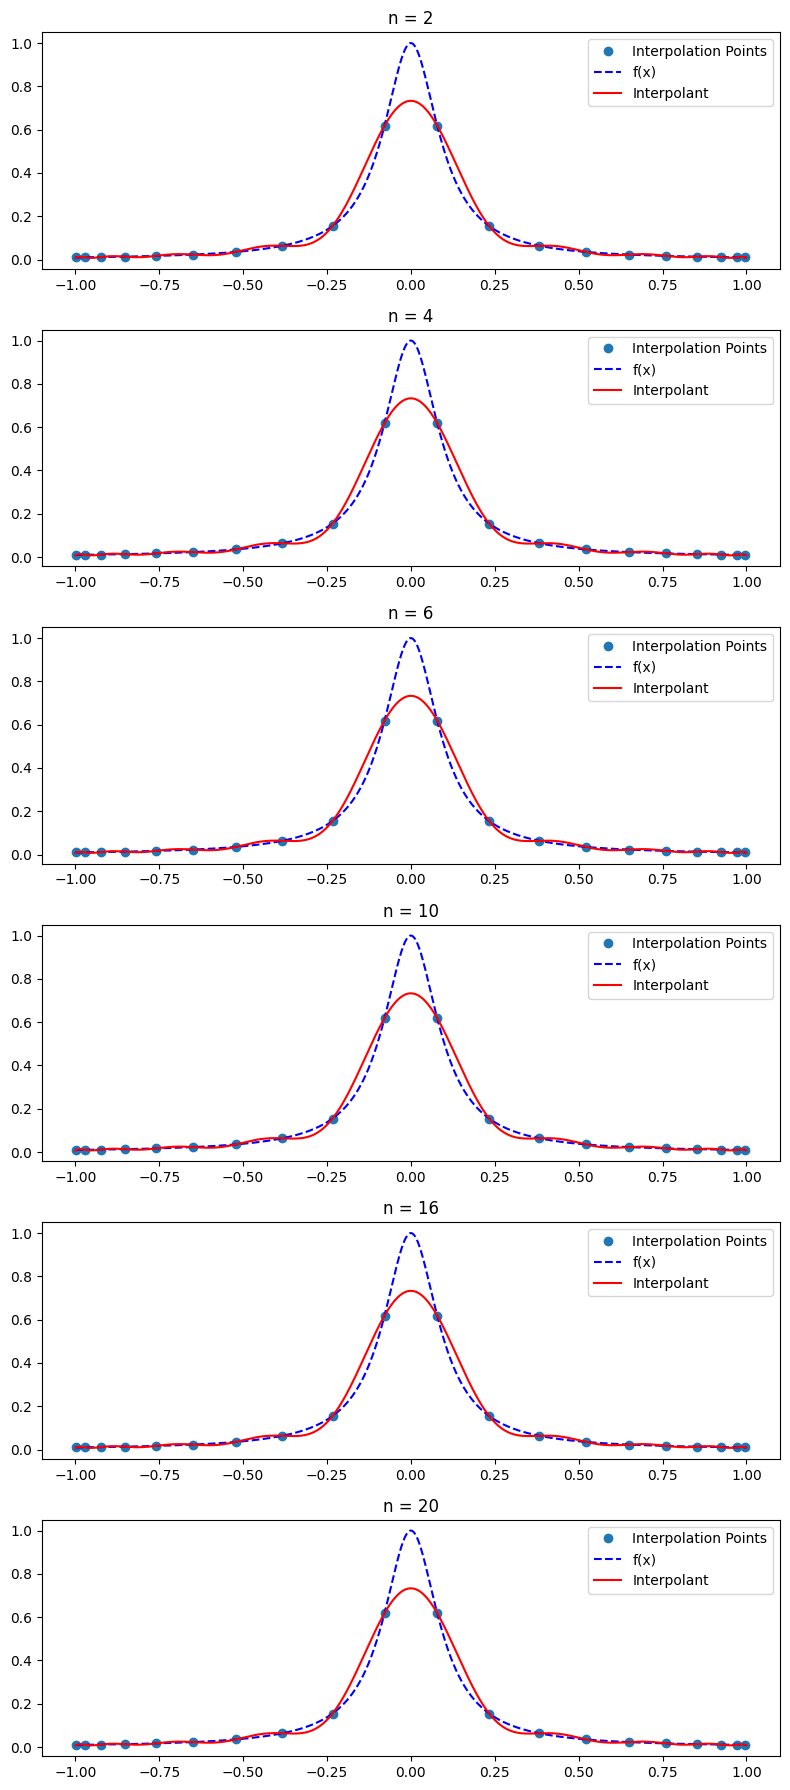

In [17]:
fig, axes = plt.subplots(len(n_values), 1, figsize=(8, 3 * len(n_values)))

for a, n in zip(axes, n_values):
    j = np.arange(1, N+1)
    x_nodes = np.cos((2*j - 1) * np.pi / (2*N))
    y_nodes = f(x_nodes)
    weights = barycentric_weights(x_nodes)
    bary_out = barycentric_interpolate(x_nodes, y_nodes, weights, x_reps)
    a.plot(x_nodes, y_nodes, 'o', label='Interpolation Points')
    a.plot(x_reps, f_out, 'b--', label='f(x)')
    a.plot(x_reps, bary_out, 'r-', label='Interpolant')
    a.set_title(f'n = {n}')
    a.legend()
plt.tight_layout()
plt.show()